<img src="images/usm.jpg" width="480" height="240" align="left"/>

# MAT281 - Laboratorio N°04

## Objetivos del laboratorio

* Reforzar conceptos básicos de reducción de dimensionalidad.

## Contenidos

* [Problema 01](#p1)


<a id='p1'></a>
## I.- Problema 01


<img src="https://www.goodnewsnetwork.org/wp-content/uploads/2019/07/immunotherapy-vaccine-attacks-cancer-cells-immune-blood-Fotolia_purchased.jpg" width="360" height="360" align="center"/>


El **cáncer de mama**  es una proliferación maligna de las células epiteliales que revisten los conductos o lobulillos mamarios. Es una enfermedad clonal; donde una célula individual producto de una serie de mutaciones somáticas o de línea germinal adquiere la capacidad de dividirse sin control ni orden, haciendo que se reproduzca hasta formar un tumor. El tumor resultante, que comienza como anomalía leve, pasa a ser grave, invade tejidos vecinos y, finalmente, se propaga a otras partes del cuerpo.

El conjunto de datos se denomina `BC.csv`, el cual contine la información de distintos pacientes con tumosres (benignos o malignos) y algunas características del mismo.


Las características se calculan a partir de una imagen digitalizada de un aspirado con aguja fina (FNA) de una masa mamaria. Describen las características de los núcleos celulares presentes en la imagen.
Los detalles se puede encontrar en [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].


Lo primero será cargar el conjunto de datos:

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
# cargar datos
df = pd.read_csv(os.path.join("data","BC.csv"), sep=",")
df['diagnosis'] = df['diagnosis'] .replace({'M':1,'B':0})
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Basado en la información presentada responda las siguientes preguntas:


1. Normalizar para las columnas numéricas con procesamiento **StandardScaler**.

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled = pd.DataFrame(scaler.fit_transform(df.drop(columns = ['id','diagnosis'])))

columns = df.drop(columns = ['id','diagnosis']).columns

scaled.columns = columns

In [4]:
scaled

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


2. Realice un gráfico de correlación. Identifique la existencia de colinealidad.

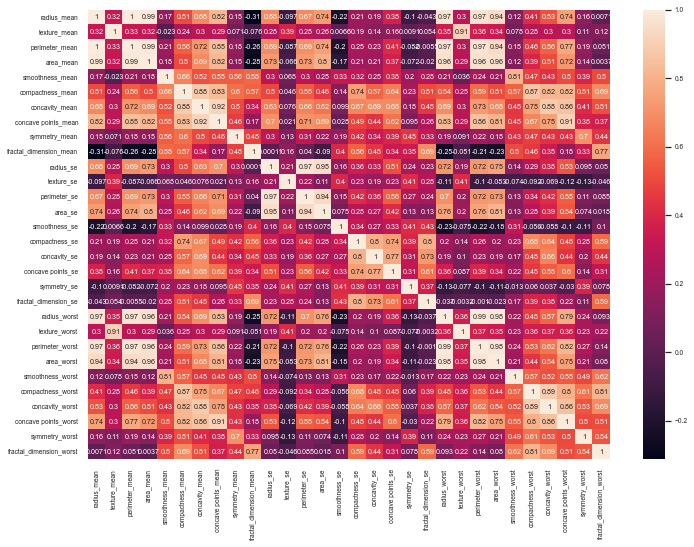

In [5]:
corrMatrix = scaled.corr()

sns.set(font_scale=0.6)

sns.heatmap(corrMatrix, annot=True)

plt.show()

Podemos ver la existencia de colinealidad en algunas variables, donde el coeficiente de correlacion es alto, como lo puede ser perimeter_mean con radius_mean.

3. Realizar un ajuste PCA con **n_components = 10**. Realice un gráfico de la varianza y varianza acumulada. Interprete.

In [6]:
features = scaled.columns

x = df.loc[:, features].values
y = df.loc[:, ['diagnosis']].values

x = StandardScaler().fit_transform(x)

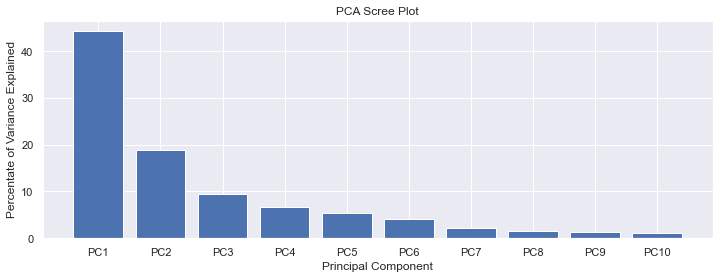

In [7]:
sns.set(font_scale=1)

# ajustar modelo
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
principalComponents = pca.fit_transform(x)

# graficar varianza por componente
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = ['PC1', 'PC2', 'PC3', 'PC4','PC5','PC6','PC7','PC8','PC9','PC10']

plt.figure(figsize=(12,4))
plt.bar(x= range(1,11), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

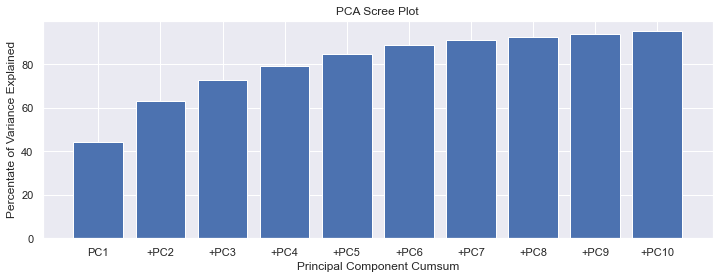

In [8]:
# graficar varianza por la suma acumulada de los componente
percent_variance_cum = np.cumsum(percent_variance)
columns = ['PC1', '+PC2', '+PC3', '+PC4','+PC5','+PC6'
          ,'+PC7','+PC8','+PC9','+PC10']

plt.figure(figsize=(12,4))
plt.bar(x= range(1,11), height=percent_variance_cum, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component Cumsum')
plt.title('PCA Scree Plot')
plt.show()

Podemos ver que solo considerando las 7 primeras componentes, ya se puede explicar más de un 90% aproximadamente por lo cual tenemos 7 componentes principales.

4. Devuelva un dataframe con las componentes principales.

In [9]:
pca = PCA(n_components=7)

principalComponents = pca.fit_transform(x)

principalDataframe = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2', 'PC3', 'PC4','PC5','PC6','PC7'])
targetDataframe = df[['diagnosis']]

newDataframe = pd.concat([principalDataframe, targetDataframe],axis = 1)
newDataframe.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,diagnosis
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411422,2.159364,1
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013355,1
2,5.733896,-1.075174,-0.551748,0.912083,-0.177085,0.541458,-0.668159,1
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053425,1.429920,1
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226499,-0.936215,1


5. Aplique al menos tres modelos de clasificación. Para cada modelo, calule el valor de sus métricas.

In [10]:
# componenetes proyectadas

Y= df[['diagnosis']]
X_new = pca.fit_transform(df[scaled.columns])

In [11]:
from sklearn.model_selection import train_test_split

# crear conjunto de entrenamiento y testeo pero en con las componentes proyectadas
X_train, X_test, Y_train, Y_test = train_test_split(X_new, Y, test_size=0.2, random_state = 2)

In [12]:
from sklearn.ensemble import RandomForestClassifier
from metrics_classification import *

clf = RandomForestClassifier(max_depth=2, random_state=0)

clf.fit(X_train, Y_train)

y_true =  Y_test['diagnosis'].tolist()
y_pred = list(clf.predict(X_test))

# ejemplo 
df_temp = pd.DataFrame(
    {
        'y':list(y_true),
        'yhat':y_pred
        }
)

df_metrics = summary_metrics(df_temp)
print(df_metrics)

C:\Users\jvall\miniconda3\envs\mat281\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


   accuracy  recall  precision  fscore
0    0.9298  0.9266     0.9266  0.9266


In [13]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()

log.fit(X_train, Y_train)

y_true =  Y_test['diagnosis'].tolist()
y_pred = list(log.predict(X_test))

# ejemplo 
df_temp = pd.DataFrame(
    {
        'y':list(y_true),
        'yhat':y_pred
        }
)

df_metrics = summary_metrics(df_temp)
print(df_metrics)

   accuracy  recall  precision  fscore
0    0.9386  0.9338     0.9373  0.9355


C:\Users\jvall\miniconda3\envs\mat281\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\jvall\miniconda3\envs\mat281\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [14]:
from sklearn import tree

tree = tree.DecisionTreeClassifier()

tree = tree.fit(X_train, Y_train)

y_true =  Y_test['diagnosis'].tolist()
y_pred = list(tree.predict(X_test))

# ejemplo 
df_temp = pd.DataFrame(
    {
        'y':list(y_true),
        'yhat':y_pred
        }
)

df_metrics = summary_metrics(df_temp)
print(df_metrics)

   accuracy  recall  precision  fscore
0    0.9211  0.9193     0.9162  0.9177
